# Model Building using Linear Regression

In this problem, we are predicting the Sales of Carseats based on various other variables.

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#import os
#os.chdir('D:/Academic Operations/DSBA - Python/Blended/Predictive Modelling/Linear Regression/4')
#os.getcwd()

In [3]:
df = pd.read_csv('Carseats.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


Let us check the data dictionary.

$\underline{Description}$
A simulated data set containing sales of child car seats at 400 different stores.

$\underline{Format}$
A data frame with 400 observations on the following 11 variables.



$\underline{Sales}$
Unit sales (in thousands) at each location

$\underline{CompPrice}$
Price charged by competitor at each location

$\underline{Income}$
Community income level (in thousands of dollars)

$\underline{Advertising}$
Local advertising budget for company at each location (in thousands of dollars)

$\underline{Population}$
Population size in region (in thousands)

$\underline{Price}$
Price company charges for car seats at each site

$\underline{ShelveLoc}$
A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

$\underline{Age}$
Average age of the local population

$\underline{Education}$
Education level at each location

$\underline{Urban}$
A factor with levels No and Yes to indicate whether the store is in an urban or rural location

$\underline{US}$
A factor with levels No and Yes to indicate whether the store is in the US or not

## We will use the whole data to perform basics of Exploratory Data Analysis and then use the data to build descriptive models.

## Let us check the basic measures of Descriptive Statistics of the numerical variables.

In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


Let us look at the data types of each of the predictor variables.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


Now, let us look at the distribution plot of the Y_train variable.

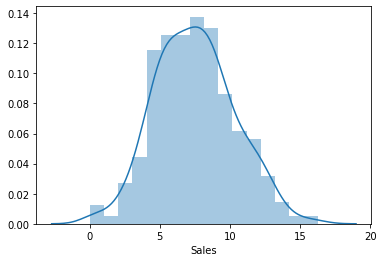

In [6]:
sns.distplot(df['Sales'])
plt.show()

First let us look at this from a Linear Regression perspective where we take only the variable 'Price' and try to infer its relationship with 'Sales'.

Let us look at the scatterplot between 'Sales' and 'Price' and try to plot a line as well. Also, we will check the Pearsonian Correlation Coefficient.

In [7]:
from scipy.stats import pearsonr

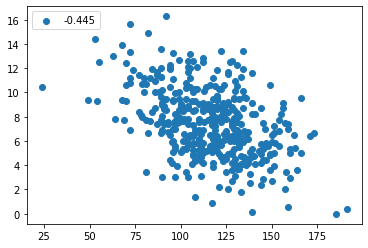

In [8]:
plt.scatter(df['Price'],df['Sales'],label=round(pearsonr(df['Price'],df['Sales'])[0],4))
plt.legend(loc = 'upper left');

Here, we see that these two variables are negatively correlated.

Let us now go ahead and build the Simple Linear Regression model between the variables 'Price' and 'Sales'.

In [9]:
import statsmodels.formula.api as SM

In [10]:
formula_SLR ='Sales~Price'

In [11]:
model_SLR = SM.ols(formula=formula_SLR,data=df).fit() 
model_SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Sat, 01 Aug 2020   Prob (F-statistic):           7.62e-21
Time:                        02:22:24   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6419      0.633     21.558      0.000      12.398      14.886
Price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We notice that the ${R^2}$ value in this case is very low. 
Only around 20% variability in the dependent variable is being explained by the 'Price' variable in the.

For Simple Linear Regression, the square of the Pearson's correlation is same as the value of the ${R^2}$.
Let us check it now.

In [12]:
print(np.square(pearsonr(df['Price'],df['Sales'])[0]))
print(round(np.square(pearsonr(df['Price'],df['Sales'])[0]),ndigits=3))

0.1979811502111947
0.198


If we round off the value of the correlation value to the third decimal place, we see that the value is same as the value of ${R^2}$ got from the Simple Linear Regression.

Before, we build the Multiple Linear Regression model, let us play around with the data and try different kinds of variable transformation before building the linear regression model.

We will try scaling the data of the predictor and target variable and build the Linear Regression model once more to see the differences.

In [13]:
scaled_price = (df['Price']-np.mean(df['Price']))/np.std(df['Price'],ddof=1)
scaled_price

0      0.177601
1     -1.385119
2     -1.511826
3     -0.793820
4      0.515486
         ...   
395    0.515486
396    0.177601
397    1.824793
398   -0.878291
399    0.177601
Name: Price, Length: 400, dtype: float64

In [14]:
scaled_sales = (df['Sales']-np.mean(df['Sales']))/np.std(df['Sales'],ddof=1)
scaled_sales

0      0.709488
1      1.318528
2      0.907780
3     -0.034108
4     -1.184911
         ...   
395    1.796554
396   -0.480265
397   -0.030567
398   -0.551084
399    0.783847
Name: Sales, Length: 400, dtype: float64

Let us check the distribution plot of the log of the 'Sales' variable.

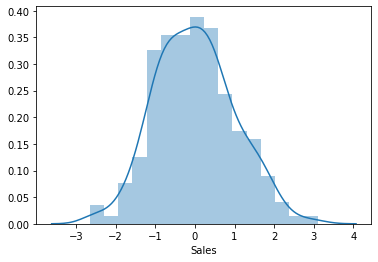

In [15]:
sns.distplot(scaled_sales);

In [17]:
model_SLR_exp = SM.ols(formula='scaled_sales~scaled_price',data=df).fit()
model_SLR_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           scaled_sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Sat, 01 Aug 2020   Prob (F-statistic):           7.62e-21
Time:                        02:23:21   Log-Likelihood:                -522.95
No. Observations:                 400   AIC:                             1050.
Df Residuals:                     398   BIC:                             1058.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.041e-16      0.045   2.32e-15      1.000      -0.088       0.088
scaled_price    -0.4450      0.045     -9.912      0.000      -0.533      -0.357
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that the ${R^2}$ value has remained the same after this transformation. We can say that scaling a variable for Linear Regression will give us the same values as compared to the unscaled variables.

We will now build the Multiple Linear Regression model.

So for that let us convert the categorical variables into dummy variables.

In [18]:
df_allvar = pd.get_dummies(df)

In [19]:
df_allvar.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


Let us now check the correlation amongst the predictor variables just to make sure that the predictor variables are not highly correlated amongst themselves.

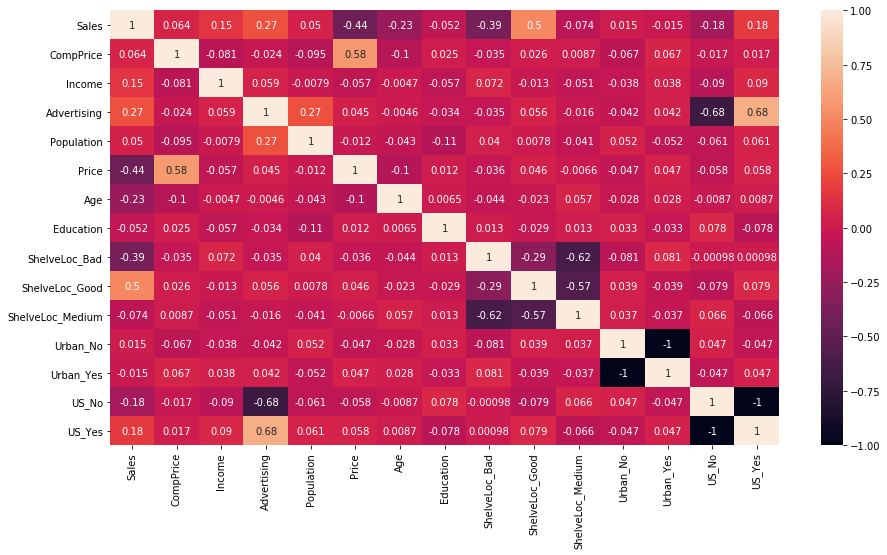

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(df_allvar.corr(),annot=True)
plt.show()

Let us now go ahead and build a linear regression on the data with all the levels of categorical variables.

# Model using dummy without dropping one level

In [21]:
formula_MLR_1 = 'Sales~CompPrice+Income+Advertising+Population+Price+Age+Education+ShelveLoc_Bad+ShelveLoc_Good+ShelveLoc_Medium+Urban_No+Urban_Yes+US_No+US_Yes'

In [22]:
model_MLR_1 = SM.ols(formula=formula_MLR_1,data=df_allvar).fit()
model_MLR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          1.60e-166
Time:                        02:23:51   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.3853      0.253     13.370      0.000       2.887       3.883
CompPrice            0.0928      0.004     22.378      0.000       0.085       0.101
Income               0.0158      0.002      8.565      0.000       0.012       0.019
Advertising          0.1231      0.011     11.066      0.000       0.101       0.145
Population           0.0002      0.000      0.561      0.575      -0.001       0.001
Price               -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                 -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education           -0.0211      0.020     -1.070      0.285      -0.060       0.018
ShelveLoc_Bad       -1.1405      0.118     -9.629      0.000      -1.373      -0.908
ShelveLoc_Good       3.7096      0.121     30.652      0.000       3.472       3.948
ShelveLoc_Medium     0.8162      0.107      7.605      0.000       0.605       1.027
Urban_No             1.6312      0.138     11.789      0.000       1.359       1.903
Urban_Yes            1.7541      0.139     12.629      0.000       1.481       2.027
US_No                1.7847      0.146     12.243      0.000       1.498       2.071
US_Yes               1.6006      0.148     10.783      0.000       1.309       1.892
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.29e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.65e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The p-value for the variable 'Population' and the variable 'Education' is high. These variables are statistically not important. But we need to understand these variables from a business point of view and then only drop the variables if required.

But here in the above model built, we have not dropped at least one of the categories while creating the dummy variables and thus there seems to be a problem of multicollinearity in the data. 

We will see the test of multicollinearity in a short while but we will rebuild the model.

For rebuilding the model, we will re-create the data set with appropriate levels of dummy variables.

In [23]:
df_dummy = pd.get_dummies(df,drop_first=True)

In [24]:
df_dummy.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


Here, we see that the number of columns have been reduced and only the necessary columns are present.

Let us now check the correlation matrix in the form of a heatmap.

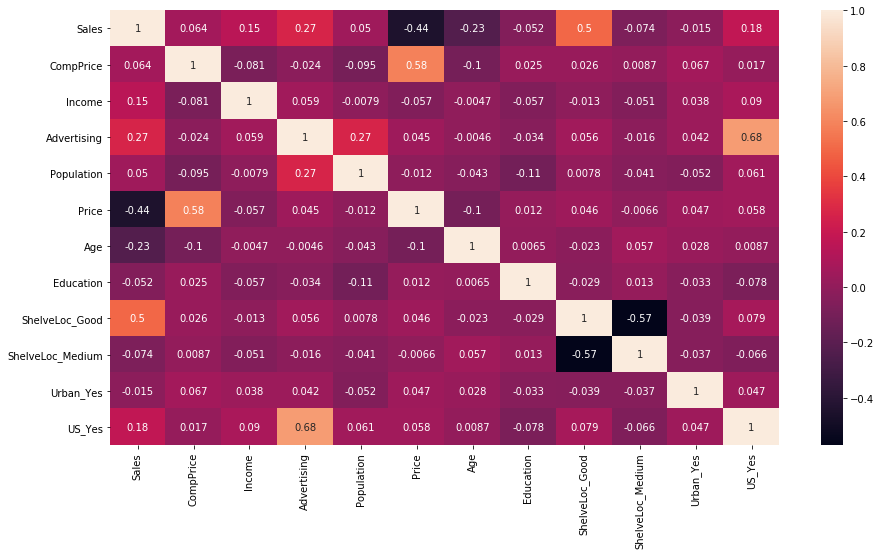

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(df_dummy.corr(),annot=True)
plt.show()

Let us now go ahead and build our Linear Regression model on data with the appropriate number of dummy variable levels.

# Model using appropriate number of dummy variable levels.

Let us plot various bivariate plots to understand the relationship between the various variables.

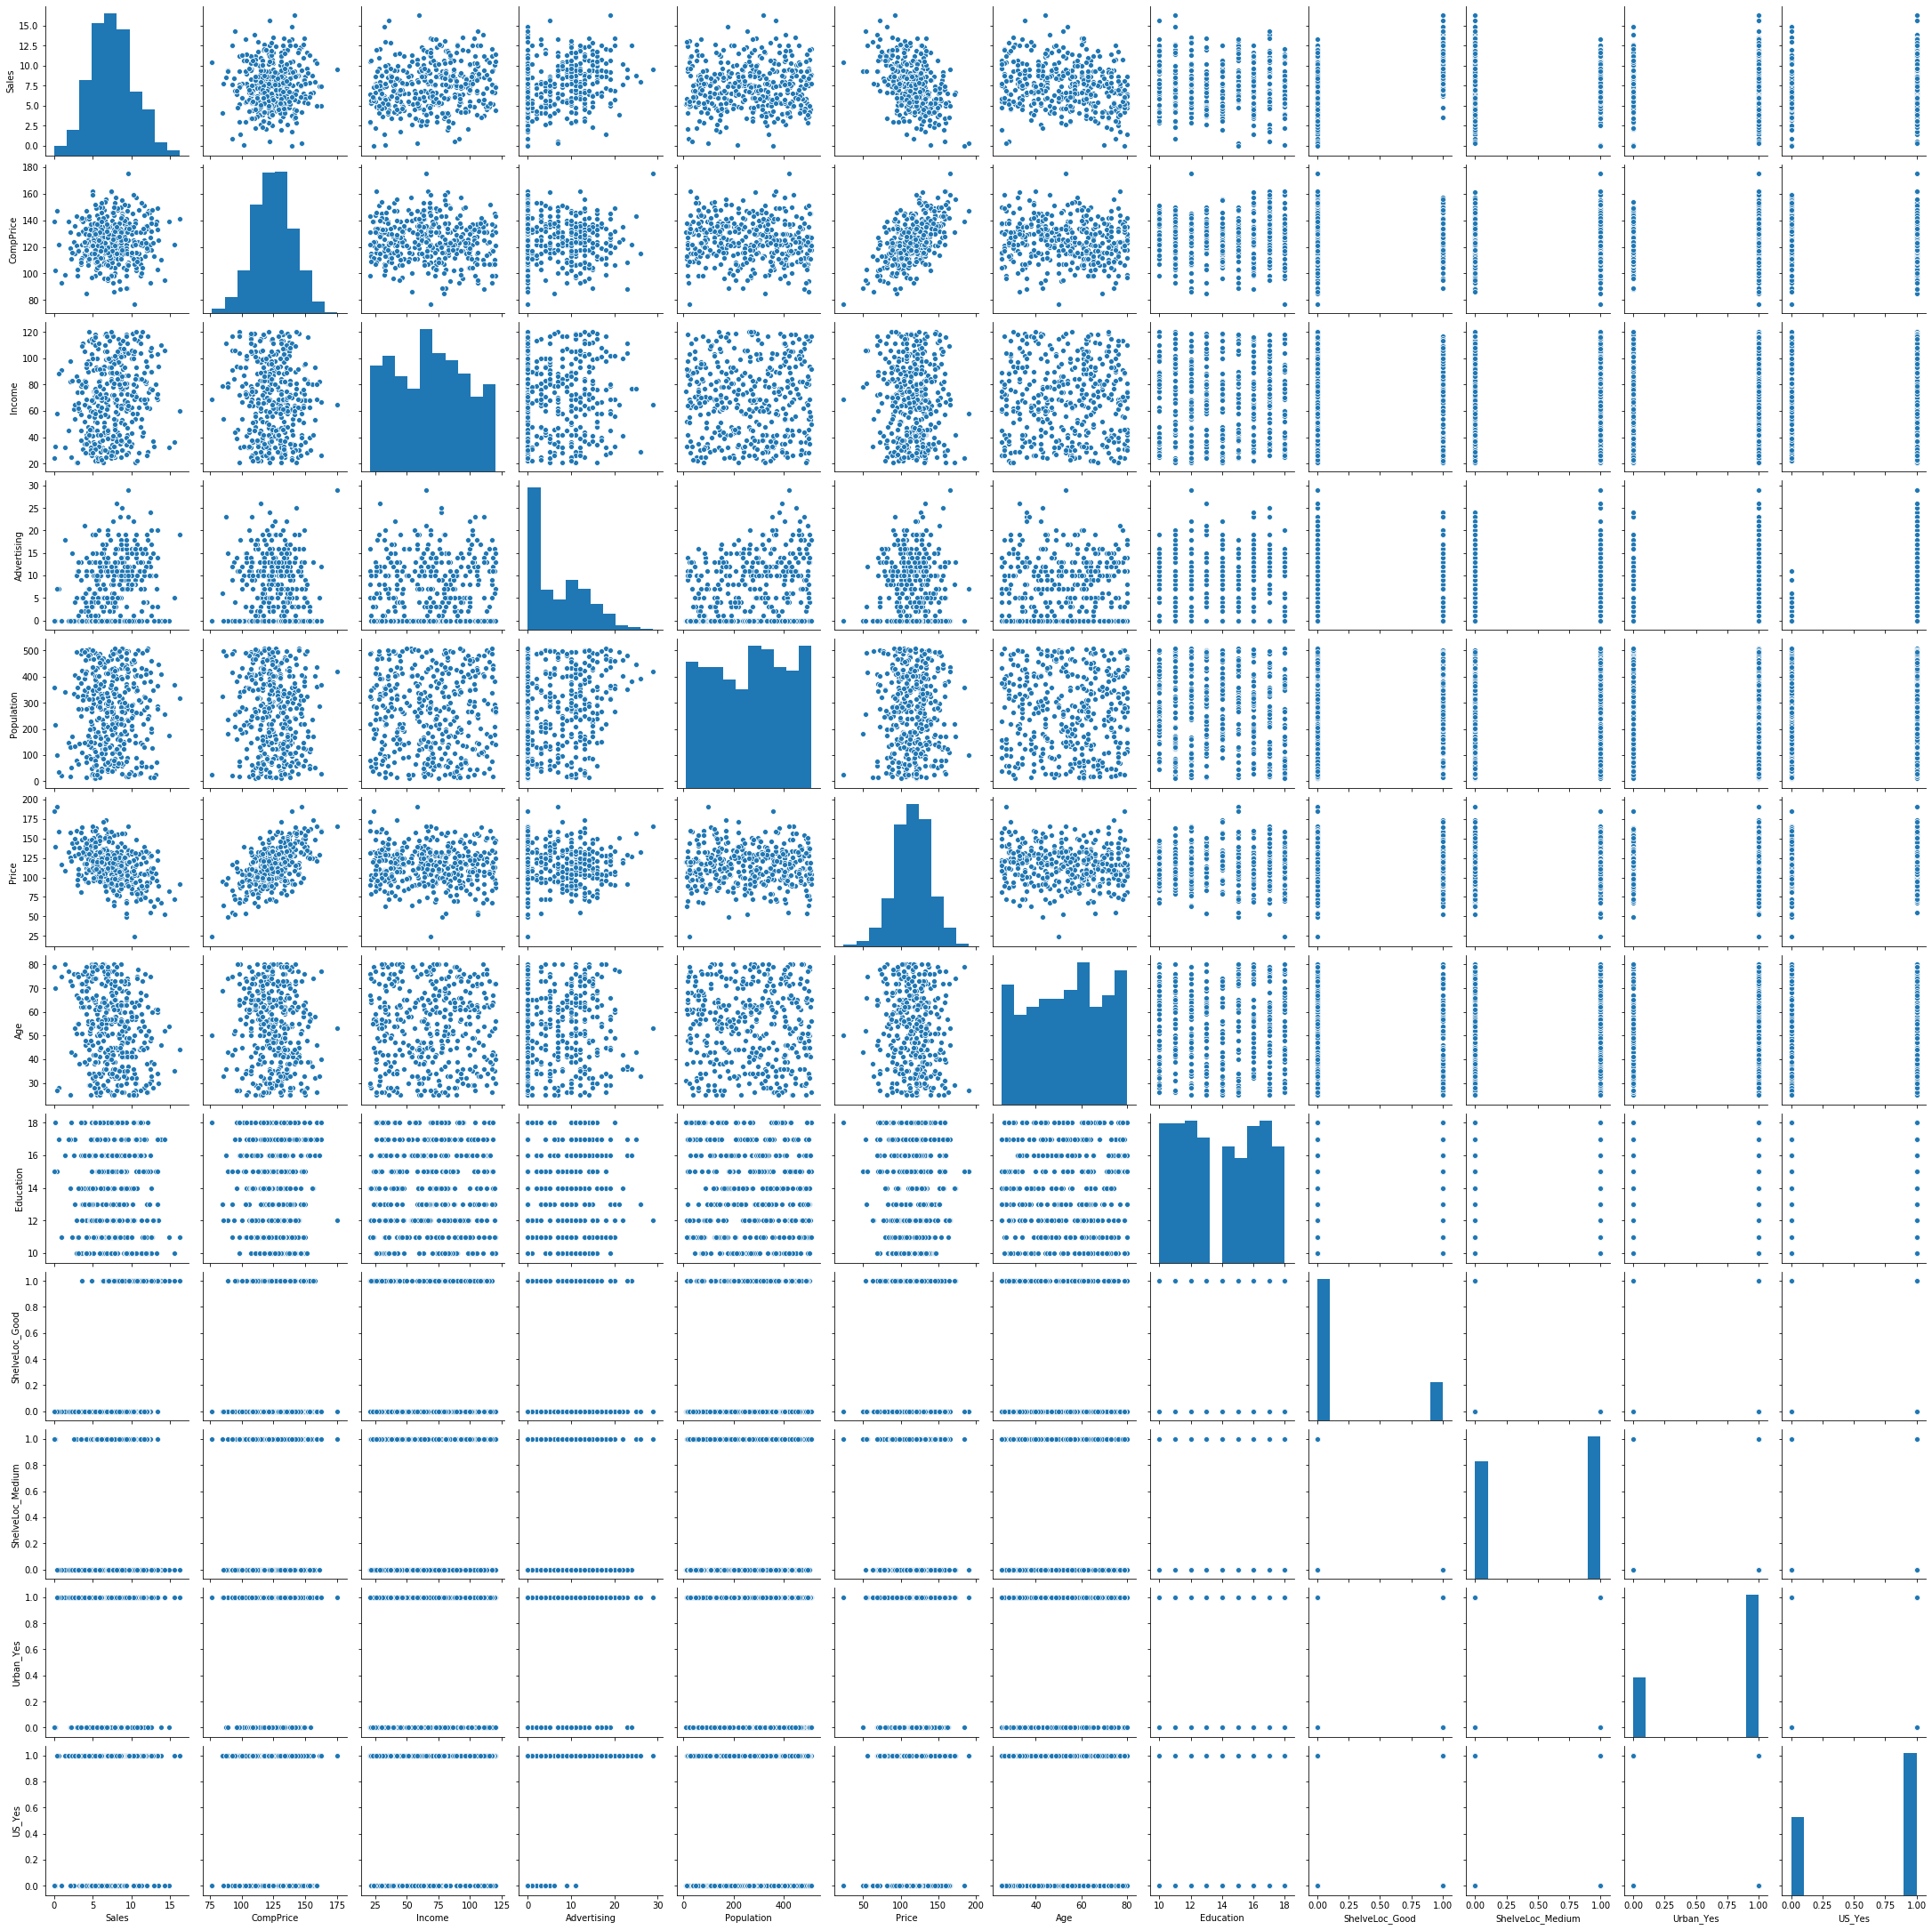

In [26]:
sns.pairplot(df_dummy)

In [27]:
formula_MLR_2 ='Sales~CompPrice+Income+Advertising+Population+Price+Age+Education+ShelveLoc_Good+ShelveLoc_Medium+Urban_Yes+US_Yes'

In [28]:
model_MLR_2 = SM.ols(formula=formula_MLR_2,data=df_dummy).fit()
model_MLR_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          1.60e-166
Time:                        02:26:57   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.6606      0.603      9.380      0.000       4.474       6.847
CompPrice            0.0928      0.004     22.378      0.000       0.085       0.101
Income               0.0158      0.002      8.565      0.000       0.012       0.019
Advertising          0.1231      0.011     11.066      0.000       0.101       0.145
Population           0.0002      0.000      0.561      0.575      -0.001       0.001
Price               -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                 -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education           -0.0211      0.020     -1.070      0.285      -0.060       0.018
ShelveLoc_Good       4.8502      0.153     31.678      0.000       4.549       5.151
ShelveLoc_Medium     1.9567      0.126     15.516      0.000       1.709       2.205
Urban_Yes            0.1229      0.113      1.088      0.277      -0.099       0.345
US_Yes              -0.1841      0.150     -1.229      0.220      -0.479       0.111
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now, let us check and treat the multicollinearity problem if it is present.

Now, we will calculate the Variance Inflation Factor (VIF). We will calculate the Variance Inflation Factor by an user defined function.

VIF regresses the dependent variables amongst themselves and then calculates the VIF values based on the ${R^2}$ of each such regression.

# The formula for VIF calculation is :
# vif = $\frac{1}{1 - {R^2}}$

Below is the function that is created to calculate the Variance Inflation Factor (VIF) values.
- 1st line code is about defining a function "vif_cal" which we shall use to call the function.
- We then define the x or the predictor variables. 
- The second step is to get the data in each of the column variable
- Then we define a 'for' loop where the y or the target variable is defined as one of the variables of the input data set.
- The x or the predictor variables are then defined as all the variables of the input data except the y or the target variable defined in the last step.
- We then fit a regression function and calculate the ${R^2}$ value which is being stored in the variable rsq.
- Another variable by the name of vif is defined and the ${R^2}$ value is put into the formula of the vif calculation.
- Lastly, we print this value.

This process is being repeated for all the predictor variables.


In [29]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [30]:
vif_cal(input_data=df_dummy[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes','US_Yes']])

CompPrice  VIF =  1.55
Income  VIF =  1.02
Advertising  VIF =  2.1
Population  VIF =  1.15
Price  VIF =  1.54
Age  VIF =  1.02
Education  VIF =  1.03
ShelveLoc_Good  VIF =  1.51
ShelveLoc_Medium  VIF =  1.52
Urban_Yes  VIF =  1.02
US_Yes  VIF =  1.98


Now, let us understand the mathematical significance of any one of these vif calculations.

We will manually do the calculation behind this custom function for the variable 'CompPrice'.

In [31]:
#Building the model

model_vif = SM.ols(formula='CompPrice~Income+Advertising+Population+Price+Age+Education+ShelveLoc_Good+ShelveLoc_Medium+Urban_Yes+US_Yes',
                   data=df_dummy)

In [32]:
#Fitting the model

model_vif_fit = model_vif.fit()

In [33]:
#Calculating the vif from the above formula

round(1/(1-model_vif_fit.rsquared),2)

1.55

In this way, the vif value for all the predictor variables is calculated.

We know that the value of ${R^2}$ of any regression lies between 0 and 1. 0 means that all the predictor variables combined can only explain 0% in the variation in the target variable where as 1 means that all the predictor variables combined can explain 100% in the variation in the target variable.

Higher the value of ${R^2}$, 1 - ${R^2}$ will be correspondingly smaller. Thus, the inverse of a very small number will be a huge number.

# Explanation of VIF via various exercises

Let us check the vif of the data frame which contains the dummy variables without dropping a category

In [34]:
vif_cal(input_data=df_allvar[[ 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes']])

CompPrice  VIF =  1.55
Income  VIF =  1.02
Advertising  VIF =  2.1
Population  VIF =  1.15
Price  VIF =  1.54
Age  VIF =  1.02
Education  VIF =  1.03
ShelveLoc_Bad  VIF =  inf
ShelveLoc_Good  VIF =  inf
ShelveLoc_Medium  VIF =  inf


C:\Users\91976\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


Urban_No  VIF =  inf
Urban_Yes  VIF =  inf
US_No  VIF =  inf
US_Yes  VIF =  inf


The above values corroborates our understanding of vif. Since there was a presence of multicollinearity we see that the vif values are very high. 

We can consider a rule of thumb that if vif is greater than 5, we can choose to drop the variable as there can be a problem of multicollinearity. This essentially means that we can choose to drop a predictor variable whose 80% variation is being explained by the other predictor variables.

Let us now perform an exercise and check how the vif values would differ if we forcefully enter a variable which should be having a strong collinearity with one of the variables.

In [35]:
df_dummy_copy = df_dummy.copy()

In [36]:
df_dummy_copy['Incomesq'] = np.square(df_dummy_copy['Income'])
#introducing a variable which is the square one of the predictor variables
df_dummy_copy.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Incomesq
0,9.50,138,73,11,276,120,42,17,0,0,1,1,5329
1,11.22,111,48,16,260,83,65,10,1,0,1,1,2304
2,10.06,113,35,10,269,80,59,12,0,1,1,1,1225
3,7.40,117,100,4,466,97,55,14,0,1,1,1,10000
4,4.15,141,64,3,340,128,38,13,0,0,1,0,4096


In [37]:
df_dummy_copy.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes', 'Incomesq'],
      dtype='object')

In [38]:
vif_cal(input_data=df_dummy_copy[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes', 'Incomesq']])

CompPrice  VIF =  1.58
Income  VIF =  28.95
Advertising  VIF =  2.1
Population  VIF =  1.15
Price  VIF =  1.56
Age  VIF =  1.02
Education  VIF =  1.03
ShelveLoc_Good  VIF =  1.51
ShelveLoc_Medium  VIF =  1.52
Urban_Yes  VIF =  1.03
US_Yes  VIF =  1.98
Incomesq  VIF =  28.97


Here, we see that the vif has indeed increased for the Income and Incomesq variable. We can go ahead and drop the 'Incomesq' variable as that variable has been derived from the 'Income' variable.

# End of the VIF exercises

On our original model, we see that the vif of the 'Advertising' is comparatively a little higher but it is not so high as to drop it. We will keep it in our model. But can drop variables that have a comparatively high vif along with a high p-value indicating the particular variable might not be significant for this model.

If variables are decided to be dropped on the basis of vif, we will drop them one by one. After one variable is dropped we are going to run the regression model and the vif function. Then if needed we will drop more variables. 

Dropping variables means losing out on information. That can hamper the predictive as well as the descriptive power of the model.

Let us check our model once more.

In [39]:
model_MLR_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          1.60e-166
Time:                        02:29:42   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.6606      0.603      9.380      0.000       4.474       6.847
CompPrice            0.0928      0.004     22.378      0.000       0.085       0.101
Income               0.0158      0.002      8.565      0.000       0.012       0.019
Advertising          0.1231      0.011     11.066      0.000       0.101       0.145
Population           0.0002      0.000      0.561      0.575      -0.001       0.001
Price               -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                 -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education           -0.0211      0.020     -1.070      0.285      -0.060       0.018
ShelveLoc_Good       4.8502      0.153     31.678      0.000       4.549       5.151
ShelveLoc_Medium     1.9567      0.126     15.516      0.000       1.709       2.205
Urban_Yes            0.1229      0.113      1.088      0.277      -0.099       0.345
US_Yes              -0.1841      0.150     -1.229      0.220      -0.479       0.111
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We notice that the p-value for the t-statistic calculation for the 'Population' variable is the highest (higher than 0.05).

For the $\underline{t-statistic}$ for every co-efficient of the Linear Regression the null and alternate Hypothesis is as follows:
#### ${H_0}$ : The variable is significant.
#### ${H_1}$:  The variable is not significant.


Lower the p-value for the t-statistic more significant are the variables.

# Model without the 'Population' variable
## Model 3

In [40]:
formula_MLR_3 = 'Sales~CompPrice+Income+Advertising+Price+Age+Education+ShelveLoc_Good+ShelveLoc_Medium+Urban_Yes+US_Yes'

In [41]:
model_MLR_3 = SM.ols(formula=formula_MLR_3,data=df_dummy).fit()
model_MLR_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     268.2
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          1.11e-167
Time:                        02:30:01   Log-Likelihood:                -569.15
No. Observations:                 400   AIC:                             1160.
Df Residuals:                     389   BIC:                             1204.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.7619      0.575     10.015      0.000       4.631       6.893
CompPrice            0.0926      0.004     22.436      0.000       0.084       0.101
Income               0.0158      0.002      8.560      0.000       0.012       0.019
Advertising          0.1250      0.011     11.844      0.000       0.104       0.146
Price               -0.0953      0.003    -35.736      0.000      -0.101      -0.090
Age                 -0.0461      0.003    -14.520      0.000      -0.052      -0.040
Education           -0.0224      0.020     -1.145      0.253      -0.061       0.016
ShelveLoc_Good       4.8467      0.153     31.709      0.000       4.546       5.147
ShelveLoc_Medium     1.9521      0.126     15.526      0.000       1.705       2.199
Urban_Yes            0.1189      0.113      1.055      0.292      -0.103       0.340
US_Yes              -0.1991      0.147     -1.351      0.177      -0.489       0.091
==============================================================================
Omnibus:                        0.899   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.826
Skew:                           0.111   Prob(JB):                        0.662
Kurtosis:                       3.012   Cond. No.                     2.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There is almost no change in the ${R^2}$ values. 

While adding or subtracting variables from a regression model to refine the model, we need to be very careful about the Adjusted ${R^2}$ values. Adding any particular value which is not significant can increase the ${R^2}$ value but the Adjusted ${R^2}$ changes by the addition or the subtraction of significant variables.

Let us check the $R^2$ and adjusted $R^2$ values for the $2^{nd}$ and $3^{rd}$ Multiple Linear Regression Model.

In [44]:
print('For the second MLR model:','\n')

print('Rsquared         ',model_MLR_2.rsquared)
print('Adjusted Rsquared',model_MLR_2.rsquared_adj)

For the second MLR model: 

Rsquared          0.8734133434127013
Adjusted Rsquared 0.8698245464475974


In [45]:
print('For the third MLR model:','\n')

print('Rsquared         ',model_MLR_3.rsquared)
print('Adjusted Rsquared',model_MLR_3.rsquared_adj)

For the third MLR model: 

Rsquared          0.8733106136278912
Adjusted Rsquared 0.8700538170630555


This means that the particular information about the store being located in the US does not help us in predicting the 'Sales' as compared to the other information that we have.

## Model 4

Let us see what happens when we drop a statistically significant variable from the model.

In this case,we will drop the 'CompPrice' model.

In [46]:
formula_MLR_4 = 'Sales~Income+Advertising+Price+Age+Education+ShelveLoc_Good+ShelveLoc_Medium+Urban_Yes+US_Yes'

In [47]:
model_MLR_4 = SM.ols(formula=formula_MLR_4,data=df_dummy).fit()

In [48]:
model_MLR_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     105.8
Date:                Sat, 01 Aug 2020   Prob (F-statistic):           6.29e-99
Time:                        02:31:52   Log-Likelihood:                -735.21
No. Observations:                 400   AIC:                             1490.
Df Residuals:                     390   BIC:                             1530.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.4510      0.699     19.243      0.000      12.077      14.825
Income               0.0134      0.003      4.820      0.000       0.008       0.019
Advertising          0.1087      0.016      6.821      0.000       0.077       0.140
Price               -0.0608      0.003    -18.446      0.000      -0.067      -0.054
Age                 -0.0500      0.005    -10.432      0.000      -0.059      -0.041
Education           -0.0125      0.030     -0.422      0.673      -0.071       0.046
ShelveLoc_Good       4.9019      0.231     21.204      0.000       4.447       5.356
ShelveLoc_Medium     2.0223      0.190     10.636      0.000       1.648       2.396
Urban_Yes            0.2621      0.170      1.540      0.124      -0.072       0.597
US_Yes              -0.0800      0.223     -0.359      0.720      -0.518       0.358
==============================================================================
Omnibus:                        0.242   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.245
Skew:                           0.059   Prob(JB):                        0.885
Kurtosis:                       2.971   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As per our understanding, we see that both the Adjusted ${R^2}$ and the ${R^2}$ values have dropped massively. The p-values of t-statistic of certain variables have also changed. This indicates that as per the last iteration of the model a few  values have become more important.

Let us again the model before dropping any statistically significant variables.

In [49]:
model_MLR_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     268.2
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          1.11e-167
Time:                        02:32:01   Log-Likelihood:                -569.15
No. Observations:                 400   AIC:                             1160.
Df Residuals:                     389   BIC:                             1204.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.7619      0.575     10.015      0.000       4.631       6.893
CompPrice            0.0926      0.004     22.436      0.000       0.084       0.101
Income               0.0158      0.002      8.560      0.000       0.012       0.019
Advertising          0.1250      0.011     11.844      0.000       0.104       0.146
Price               -0.0953      0.003    -35.736      0.000      -0.101      -0.090
Age                 -0.0461      0.003    -14.520      0.000      -0.052      -0.040
Education           -0.0224      0.020     -1.145      0.253      -0.061       0.016
ShelveLoc_Good       4.8467      0.153     31.709      0.000       4.546       5.147
ShelveLoc_Medium     1.9521      0.126     15.526      0.000       1.705       2.199
Urban_Yes            0.1189      0.113      1.055      0.292      -0.103       0.340
US_Yes              -0.1991      0.147     -1.351      0.177      -0.489       0.091
==============================================================================
Omnibus:                        0.899   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.826
Skew:                           0.111   Prob(JB):                        0.662
Kurtosis:                       3.012   Cond. No.                     2.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model 5

Let us now go ahead and drop the 'Urban_Yes' variable as that does not seem very statistically significant

In [50]:
formula_MLR_5 = 'Sales~CompPrice+Income+Advertising+Price+Age+Education+ShelveLoc_Good+ShelveLoc_Medium+US_Yes'

In [51]:
model_MLR_5 = SM.ols(formula=formula_MLR_5,data=df_dummy).fit()

In [52]:
model_MLR_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     297.7
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          1.09e-168
Time:                        02:32:30   Log-Likelihood:                -569.72
No. Observations:                 400   AIC:                             1159.
Df Residuals:                     390   BIC:                             1199.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.8140      0.573     10.142      0.000       4.687       6.941
CompPrice            0.0929      0.004     22.529      0.000       0.085       0.101
Income               0.0158      0.002      8.598      0.000       0.012       0.019
Advertising          0.1253      0.011     11.868      0.000       0.105       0.146
Price               -0.0953      0.003    -35.721      0.000      -0.101      -0.090
Age                 -0.0460      0.003    -14.488      0.000      -0.052      -0.040
Education           -0.0231      0.020     -1.180      0.239      -0.062       0.015
ShelveLoc_Good       4.8339      0.152     31.721      0.000       4.534       5.133
ShelveLoc_Medium     1.9422      0.125     15.489      0.000       1.696       2.189
US_Yes              -0.1968      0.147     -1.336      0.182      -0.486       0.093
==============================================================================
Omnibus:                        0.872   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.647   Jarque-Bera (JB):                0.832
Skew:                           0.112   Prob(JB):                        0.660
Kurtosis:                       2.989   Cond. No.                     2.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Almost no change in the ${R^2}$ and Adjusted ${R^2}$ is observed thus confirming the fact that the variable was indeed not significant.

## Model 6

Now we will check the diagnostics of the model after dropping the 'Education' variable as that does not seem significant.

In [53]:
formula_MLR_6 = 'Sales~CompPrice+Income+Advertising+Price+Age+ShelveLoc_Good+ShelveLoc_Medium+Urban_Yes'

In [54]:
model_MLR_6 = SM.ols(formula=formula_MLR_6,data=df_dummy).fit()

In [55]:
model_MLR_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     334.0
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          1.43e-169
Time:                        02:33:24   Log-Likelihood:                -570.65
No. Observations:                 400   AIC:                             1159.
Df Residuals:                     391   BIC:                             1195.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.4316      0.507     10.723      0.000       4.436       6.428
CompPrice            0.0923      0.004     22.359      0.000       0.084       0.100
Income               0.0157      0.002      8.547      0.000       0.012       0.019
Advertising          0.1155      0.008     14.946      0.000       0.100       0.131
Price               -0.0954      0.003    -35.715      0.000      -0.101      -0.090
Age                 -0.0463      0.003    -14.555      0.000      -0.053      -0.040
ShelveLoc_Good       4.8485      0.153     31.702      0.000       4.548       5.149
ShelveLoc_Medium     1.9622      0.126     15.608      0.000       1.715       2.209
Urban_Yes            0.1206      0.113      1.070      0.285      -0.101       0.342
==============================================================================
Omnibus:                        0.775   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.679   Jarque-Bera (JB):                0.778
Skew:                           0.106   Prob(JB):                        0.678
Kurtosis:                       2.961   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above model we can thus conclude that the Education level at location of the store is not a significant variable when it comes to predicting the sales.

## Model 7

From the p-value of the $t_{statistic}$ of 'Urban_Yes', the variable does not seem significant. We will run the model by dropping the variable and then we will again check the values of $R^2$ and adjusted $R^2$.

In [56]:
formula_MLR_7 = 'Sales~CompPrice+Income+Advertising+Price+Age+ShelveLoc_Good+ShelveLoc_Medium'

In [57]:
model_MLR_7 = SM.ols(formula=formula_MLR_7,data=df_dummy).fit()

In [58]:
model_MLR_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          1.25e-170
Time:                        02:33:55   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.4752      0.505     10.842      0.000       4.482       6.468
CompPrice            0.0926      0.004     22.451      0.000       0.084       0.101
Income               0.0158      0.002      8.590      0.000       0.012       0.019
Advertising          0.1159      0.008     15.006      0.000       0.101       0.131
Price               -0.0953      0.003    -35.699      0.000      -0.101      -0.090
Age                 -0.0461      0.003    -14.521      0.000      -0.052      -0.040
ShelveLoc_Good       4.8357      0.152     31.710      0.000       4.536       5.135
ShelveLoc_Medium     1.9520      0.125     15.569      0.000       1.706       2.198
==============================================================================
Omnibus:                        0.766   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.810
Skew:                           0.104   Prob(JB):                        0.667
Kurtosis:                       2.929   Cond. No.                     1.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We see that the $R^2$ and adjusted $R^2$ values does not change much if we drop the 'Urban_Yes' variable.

Let us check the p-values once more.

In [59]:
model_MLR_7.pvalues

Intercept            3.943157e-24
CompPrice            2.271686e-72
Income               2.085830e-16
Advertising          1.526542e-40
Price               3.007767e-125
Age                  1.564659e-38
ShelveLoc_Good      2.959773e-110
ShelveLoc_Medium     6.806830e-43
dtype: float64

## Model 8

Let us drop the 'Income' variable once and run the model.

In [60]:
formula_MLR_8 = 'Sales~CompPrice+Advertising+Price+Age+ShelveLoc_Good+ShelveLoc_Medium'

In [61]:
model_MLR_8 = SM.ols(formula=formula_MLR_8,data=df_dummy).fit()

In [62]:
model_MLR_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     365.1
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          2.79e-157
Time:                        02:34:57   Log-Likelihood:                -605.73
No. Observations:                 400   AIC:                             1225.
Df Residuals:                     393   BIC:                             1253.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.8830      0.520     13.236      0.000       5.861       7.905
CompPrice            0.0907      0.004     20.225      0.000       0.082       0.099
Advertising          0.1199      0.008     14.287      0.000       0.103       0.136
Price               -0.0957      0.003    -32.918      0.000      -0.101      -0.090
Age                 -0.0464      0.003    -13.415      0.000      -0.053      -0.040
ShelveLoc_Good       4.7686      0.166     28.761      0.000       4.443       5.095
ShelveLoc_Medium     1.8767      0.136     13.783      0.000       1.609       2.144
==============================================================================
Omnibus:                        1.637   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.728
Skew:                           0.140   Prob(JB):                        0.422
Kurtosis:                       2.842   Cond. No.                     1.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let us compare the $R^2$ and the adjusted $R^2$ values earlier model.

In [63]:
print('For the seventh MLR model:','\n')

print('Rsquared',model_MLR_7.rsquared)
print('Adjusted Rsquared',model_MLR_7.rsquared_adj)

For the seventh MLR model: 

Rsquared 0.871982496884308
Adjusted Rsquared 0.8696964700429564


In [64]:
print('For the eigth MLR model:','\n')

print('Rsquared',model_MLR_8.rsquared)
print('Adjusted Rsquared',model_MLR_8.rsquared_adj)

For the eigth MLR model: 

Rsquared 0.8478863359902635
Adjusted Rsquared 0.8455639899748477


In [65]:
print('We notice that there is drop of',(model_MLR_7.rsquared - model_MLR_8.rsquared),'and',(model_MLR_7.rsquared_adj-model_MLR_8.rsquared_adj),'for Rsquared and adjusted Rsquared respectively.')

We notice that there is drop of 0.024096160894044427 and 0.02413248006810864 for Rsquared and adjusted Rsquared respectively.


Let us check the p-values once more.

In [66]:
model_MLR_8.pvalues

Intercept            2.502849e-33
CompPrice            7.468854e-63
Advertising          1.375070e-37
Price               5.125064e-115
Age                  4.806872e-34
ShelveLoc_Good       1.009935e-98
ShelveLoc_Medium     1.561998e-35
dtype: float64

## Model 9

Let us drop the 'Age' variable.

In [67]:
formula_MLR_9 = 'Sales~CompPrice+Advertising+Price+ShelveLoc_Good+ShelveLoc_Medium'

In [68]:
model_MLR_9 = SM.ols(formula=formula_MLR_9,data=df_dummy).fit()

In [69]:
model_MLR_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     276.5
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          2.00e-126
Time:                        02:36:35   Log-Likelihood:                -681.12
No. Observations:                 400   AIC:                             1374.
Df Residuals:                     394   BIC:                             1398.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.8444      0.564      6.810      0.000       2.735       4.954
CompPrice            0.0937      0.005     17.366      0.000       0.083       0.104
Advertising          0.1203      0.010     11.884      0.000       0.100       0.140
Price               -0.0936      0.003    -26.741      0.000      -0.100      -0.087
ShelveLoc_Good       4.7293      0.200     23.657      0.000       4.336       5.122
ShelveLoc_Medium     1.7728      0.164     10.814      0.000       1.450       2.095
==============================================================================
Omnibus:                        0.010   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.009
Skew:                           0.005   Prob(JB):                        0.996
Kurtosis:                       2.979   Cond. No.                     1.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There is a huge drop in the values of $R^2$ and adjusted $R^2$ if we drop the 'Age'.

In [70]:
print('We notice that there is drop of',(model_MLR_8.rsquared - model_MLR_9.rsquared),'and',(model_MLR_8.rsquared_adj-model_MLR_9.rsquared_adj),'for Rsquared and adjusted Rsquared respectively.')

We notice that there is drop of 0.06965081638552273 and 0.07014274042588431 for Rsquared and adjusted Rsquared respectively.


We have thus seen the effects and power of various variables on describing the target variable.

## Predict using Model 8

Let us go ahead and check the predicted values using $\underline{Model\, 8}$

In [71]:
model_MLR_8.fittedvalues

0       7.282615
1      12.676186
2       9.811462
3       8.013679
4       6.015441
         ...    
395    12.422800
396     7.687590
397     7.816300
398     5.378930
399    10.044867
Length: 400, dtype: float64

Before we check the RMSE value, let us go ahead and check the boxplot and histogram of the predicted values.

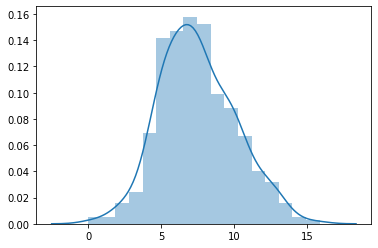

In [72]:
sns.distplot(model_MLR_8.fittedvalues);

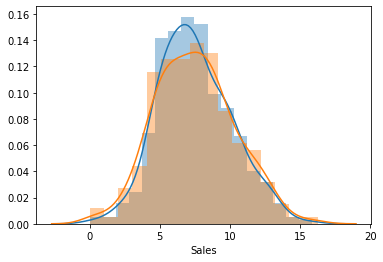

In [73]:
sns.distplot(model_MLR_8.fittedvalues)
sns.distplot(df_dummy['Sales']);

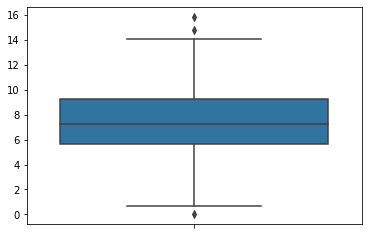

In [74]:
sns.boxplot(model_MLR_8.fittedvalues,orient='v');

## Model Evaluation

We will use both Model 7 and Model 8 to predict and check the model evaluation.

### Model 7 - Prediction and Scatterplot

In [75]:
model_MLR_7_pred = model_MLR_7.fittedvalues
model_MLR_7_pred

0       7.301699
1      12.288705
2       9.252263
3       8.517239
4       5.932080
         ...    
395    13.037864
396     7.030129
397     7.224232
398     5.429033
399     9.600999
Length: 400, dtype: float64

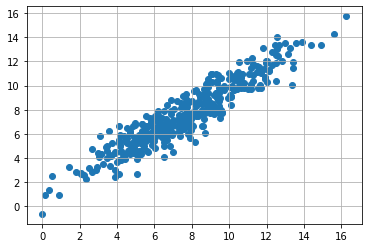

In [76]:
plt.scatter(df_dummy['Sales'],model_MLR_7_pred)
plt.grid();

### Model 8 - Prediction and Scatterplot

In [77]:
model_MLR_8_pred = model_MLR_8.fittedvalues
model_MLR_8_pred

0       7.282615
1      12.676186
2       9.811462
3       8.013679
4       6.015441
         ...    
395    12.422800
396     7.687590
397     7.816300
398     5.378930
399    10.044867
Length: 400, dtype: float64

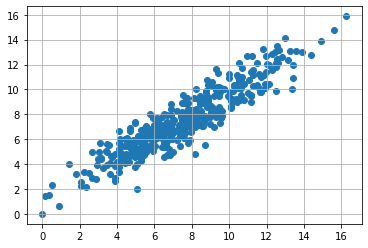

In [78]:
plt.scatter(df_dummy['Sales'],model_MLR_8_pred)
plt.grid();

In [79]:
from sklearn import metrics

### Model 7 - RMSE

In [80]:
metrics.mean_squared_error(df_dummy['Sales'],model_MLR_7_pred,squared=False)

1.0091913359643436

### Model 8 - RMSE

In [81]:
metrics.mean_squared_error(df_dummy['Sales'],model_MLR_8_pred,squared=False)

1.1000766611471098

# END

# Only for Predictive purposes of Linear Regression

If we only wanted to predict using Linear Regression and was not looking for the model building aspect of it, we can do that as well. For this exercise, we will use the same variables as of Model 2, Model 7, Model 8 and Model 9.

First we will split the data into train and test. We will build the model on the training data and check the RMSE on the test data.

###### Note: We are going to build all the models and use those predict first and then go on to evaluate those models.

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lr = LinearRegression()

In [84]:
df_dummy.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


Splitting the data into the dependent and independent variables.

In [85]:
X = df_dummy[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes']].copy()
Y = df_dummy['Sales']

Splitting the data into train (70%) and test (30%).

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

### Using only Model 2 variables to build the model on the training data and predict on the training as well as test data.

In [88]:
model_2 = lr.fit(X_train[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes']],Y_train)
#We are only using Linear Regression as a predictive tool and not a descriptive tool

In [89]:
#Training Data Prediction

model_2_pred_train = model_2.predict(X_train[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes']])

In [90]:
#Test Data Prediction

model_2_pred_test = model_2.predict(X_test[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes']])

### Using only Model 7 variables to build the model on the training data and predict on the training as well as test data.

In [91]:
model_7 = lr.fit(X_train[['CompPrice', 'Income', 'Advertising', 'Price',
       'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium']],Y_train)


In [92]:
#Training Data Prediction

model_7_pred_train = model_7.predict(X_train[['CompPrice', 'Income', 'Advertising', 'Price',
       'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium']])

In [93]:
#Test Data Prediction

model_7_pred_test = model_7.predict(X_test[['CompPrice', 'Income', 'Advertising', 'Price',
       'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium']])

### Using only Model 8 variables to build the model on the training data and predict on the training as well as test data.

In [94]:
model_8 = lr.fit(X_train[['CompPrice','Advertising', 'Price',
       'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium']],Y_train)


In [95]:
#Training Data Prediction

model_8_pred_train = model_8.predict(X_train[['CompPrice','Advertising', 'Price',
       'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium']])

In [96]:
#Test Data Prediction

model_8_pred_test = model_8.predict(X_test[['CompPrice','Advertising', 'Price',
       'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium']])

### Using only Model 9 variables to build the model on the training data and predict on the training as well as test data.

In [97]:
model_9 = lr.fit(X_train[['CompPrice','Advertising', 'Price',
       'Age', 'ShelveLoc_Good']],Y_train)


In [98]:
#Training Data Prediction

model_9_pred_train = model_9.predict(X_train[['CompPrice','Advertising', 'Price',
       'Age', 'ShelveLoc_Good']])

In [99]:
#Test Data Prediction

model_9_pred_test = model_9.predict(X_test[['CompPrice','Advertising', 'Price',
       'Age', 'ShelveLoc_Good']])

## RMSE check for all the models built

In [100]:
print('Training Data RMSE of model_2:',metrics.mean_squared_error(Y_train,model_2_pred_train))
print('Test Data     RMSE of model_2:',metrics.mean_squared_error(Y_test,model_2_pred_test))

Training Data RMSE of model_2: 1.0149047107984175
Test Data     RMSE of model_2: 1.059015545086018


In [101]:
print('Training Data RMSE of model_7:',metrics.mean_squared_error(Y_train,model_7_pred_train))
print('Test Data     RMSE of model_7:',metrics.mean_squared_error(Y_test,model_7_pred_test))

Training Data RMSE of model_7: 1.0346873676133177
Test Data     RMSE of model_7: 1.0228768932659846


In [102]:
print('Training Data RMSE of model_8:',metrics.mean_squared_error(Y_train,model_8_pred_train))
print('Test Data     RMSE of model_8:',metrics.mean_squared_error(Y_test,model_8_pred_test))

Training Data RMSE of model_8: 1.1799669367495877
Test Data     RMSE of model_8: 1.325833240865168


In [103]:
print('Training Data RMSE of model_9:',metrics.mean_squared_error(Y_train,model_9_pred_train))
print('Test Data     RMSE of model_9:',metrics.mean_squared_error(Y_test,model_9_pred_test))

Training Data RMSE of model_9: 1.8832046817645829
Test Data     RMSE of model_9: 1.6118205782799402


## Scatteplot for the predictions

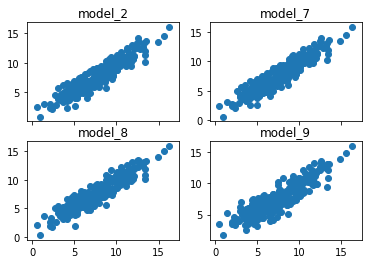

In [104]:
# Training Data

f,a =  plt.subplots(2,2,sharex=True)
a[0][0].scatter(Y_train,model_2_pred_train)
a[0][0].set_title('model_2')
a[0][1].scatter(Y_train,model_7_pred_train)
a[0][1].set_title('model_7')
a[1][0].scatter(Y_train,model_8_pred_train)
a[1][0].set_title('model_8')
a[1][1].scatter(Y_train,model_9_pred_train)
a[1][1].set_title('model_9')
plt.show()


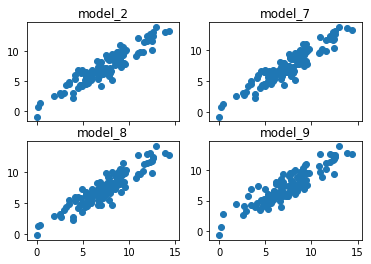

In [105]:
# Test Data

f,a =  plt.subplots(2,2,sharex=True)
a[0][0].scatter(Y_test,model_2_pred_test)
a[0][0].set_title('model_2')
a[0][1].scatter(Y_test,model_7_pred_test)
a[0][1].set_title('model_7')
a[1][0].scatter(Y_test,model_8_pred_test)
a[1][0].set_title('model_8')
a[1][1].scatter(Y_test,model_9_pred_test)
a[1][1].set_title('model_9')
plt.show()


# END